### 01. How to define Library? 

#### 01.01 How to define os, datetime, numpy,matplotlib and tensorflow ?

In [2]:
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


#### 01.02. How to define tensorboard and matplotlib using magic command?

In [3]:
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 02. How to load MNIST dataset?

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

### 03. How to normalize?

In [7]:
x_train = x_train/np.float(np.max(x_train))
x_test = x_test/np.float(np.max(x_test))

In [8]:
type(x_train)

numpy.ndarray

### 04. How to reshape from 3 dimension to 4 dimension?(number,x,y,rgb)

In [9]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [10]:
print(x_train.shape , x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 05. How to define model?

In [11]:
model = tf.keras.models.Sequential()

#### 05.01. CNN for Feature Extraction

In [12]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='SAME',input_shape=(28,28,1),activation='relu'))

#### 05.02. Max Pooling

In [13]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='SAME'))

#### 05.03. Dropout 

In [14]:
model.add(tf.keras.layers.Dropout(0.5))

#### 05.04. Flatten()

In [15]:
model.add(tf.keras.layers.Flatten())

#### [05.05 Multi Layer Perceptron Used Xavier normal initial](https://keras.io/api/layers/initializers/#glorotnormal-class)

In [16]:
model.add(tf.keras.layers.Dense(units=10,kernel_initializer= tf.keras.initializers.GlorotNormal(),activation='softmax'))

### 06. How to define adam for optimizer?

In [17]:
adam = tf.keras.optimizers.Adam(0.01)

### 07. How to compile(not one-hot encoding) ?

In [18]:
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['acc'])

### 08. How to visualize summary?

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


### [09. How to make tensorborad](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks?)

#### 09.01 How to make log  path and directory?

In [20]:
logdir = os.path.join('logs',datetime.now().strftime('%Y%m%d%H%M%S'))

#### 09.02 How to set tensorboard parameter?

In [21]:
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=logdir,
    write_graph = True,
    write_images = True,
    histogram_freq = 1
)

#### 09.03 How to play tensorboard use magic command?

In [22]:
%tensorboard --logdir logs --port 7777

Reusing TensorBoard on port 7777 (pid 6554), started 2:21:15 ago. (Use '!kill 6554' to kill it.)

### 09. How to make learning rate scheduler?

#### 09.01 Make a scheduler function

In [23]:
def schedule(epoch):
    return 0.01/(epoch+1)

#### 09.02 How to use Learning Rate Scheduler? (to view the learning rate, verbose=1)

In [24]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule,verbose=1)

### 10. How to use checkpoint?

#### 10.01 Define the path

In [25]:
save_path = 'checkpoints'

#### 10.02 How to define checkpoint?

In [26]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_path,monitor='validation_loss',verbose=1,save_best_only=True,mode='max')

### 11. How to do fitting using LearningRate?

In [27]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=3,callbacks=[tensorboard,learning_rate_scheduler,checkpoint])

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/3
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2020 - acc: 0.9390 - val_loss: 0.0876 - val_acc: 0.9743

Epoch 00002: LearningRateScheduler reducing learning rate to 0.005.
Epoch 2/3
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1096 - acc: 0.9664 - val_loss: 0.0576 - val_acc: 0.9819

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0033333333333333335.
Epoch 3/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0906 - acc: 0.9727 - val_loss: 0.0548 - val_acc: 0.9826


In [28]:
model.predict(x_test)[0]

array([5.1500221e-10, 4.1958123e-10, 1.2556559e-07, 4.6062482e-06,
       3.5707745e-10, 6.9512632e-11, 1.9901168e-14, 9.9999475e-01,
       2.1143251e-08, 5.1161550e-07], dtype=float32)

### 12. How to use history?

#### 12.01 Check the key values

In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_acc', 'lr', 'val_loss'])

#### 12.02 Check the hyper parameters

In [30]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 3,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'steps': 1875,
 'verbose': 0}

#### 12.03 Use the model from history

In [31]:
x_train[0].shape

(28, 28, 1)

In [32]:
np.argmax( history.model(x_train[0].reshape(1,28,28,1)) )


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



5

In [33]:
y_train[0]

5

#### 12.04 How to draw loss graph(train and validation)?

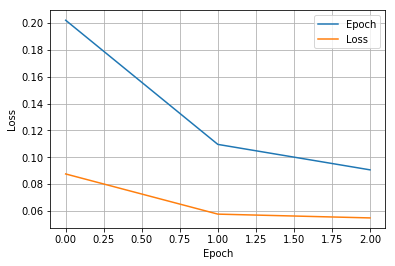

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Epoch','Loss'])
plt.grid()

### 13. How to draw accuracy graph?

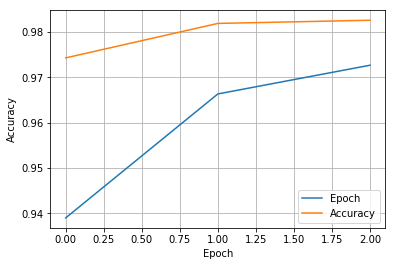

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Epoch','Accuracy'])
plt.grid()

### 14.How to evaluate ?

In [36]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05482853744006716, 0.9826]

### 15.How to save the model?

#### 15.01 save the model and weights at the same time

In [54]:
save_path1 = 'model1.h5'

In [55]:
model.save(save_path1,include_optimizer=True)

#### 15.02 save the model and weight each other

In [67]:
save_path2 = 'model2.h5'

In [68]:
model.save(save_path2)

In [69]:
with open('model2.json','w') as f:
    f.write(model.to_json())

### 16. How to load model?

#### 16.01 load the model and weights

In [70]:
model1 = tf.keras.models.load_model('model1.h5')

#### 16.02 Load the model and later load the weights

In [71]:
with open('model2.json','r') as f:
    model2=tf.keras.models.model_from_json(f.read())

In [72]:
weight = model2.load_weights(save_path2)

In [73]:
print(weight)

None


#### 16.03 load the pb files

### 17. Check the h5 files

In [76]:
import h5py

In [79]:
model_file = h5py.File('model1.h5','r+')

In [80]:
model_file.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [81]:
model_file['model_weights'].keys()

<KeysViewHDF5 ['conv2d', 'dense', 'dropout', 'flatten', 'max_pooling2d']>

In [86]:
model_file['model_weights']['conv2d']['conv2d'].keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [88]:
 model_file['model_weights']['conv2d']['conv2d']['kernel:0']

<HDF5 dataset "kernel:0": shape (3, 3, 1, 16), type "<f4">